In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

np.set_printoptions(12, suppress=True)

plt.style.use([
    'grid',
    'notebook'
])

In [2]:
A_vertices = []
B_vertices = []

Ts = 1

r = .31
mu = .4
sigma = .55
a4 = .3019

kb = 15.89e-4

In [3]:
z1_bounds = np.array([124.6572, 216.3098])
z2_bounds = np.array([118.4579, 338.5220])
z3_bounds = np.array([.0004, .0048])

for z1 in z1_bounds:
    for z2 in z2_bounds:
        for z3 in z3_bounds:
            A = np.array([
                [-z1*z3, z1*z3],
                [z1/a4, -((z1+z2))/a4]
            ])

            B = np.array([
                [0],
                [Ts*kb*z3]
            ])

            print(
                A
            )
            print(' ')

            A_vertices.append(A)
            B_vertices.append(B)

[[  -0.04986288        0.04986288    ]
 [ 412.908910235177 -805.28353759523 ]]
 
[[  -0.59835456        0.59835456    ]
 [ 412.908910235177 -805.28353759523 ]]
 
[[   -0.04986288         0.04986288    ]
 [  412.908910235177 -1534.213978138456]]
 
[[   -0.59835456         0.59835456    ]
 [  412.908910235177 -1534.213978138456]]
 
[[   -0.08652392         0.08652392    ]
 [  716.494865849619 -1108.869493209672]]
 
[[   -1.03828704         1.03828704    ]
 [  716.494865849619 -1108.869493209672]]
 
[[   -0.08652392         0.08652392    ]
 [  716.494865849619 -1837.799933752898]]
 
[[   -1.03828704         1.03828704    ]
 [  716.494865849619 -1837.799933752898]]
 


In [4]:
z1_min, z1_max = z1_bounds[0], z1_bounds[1]
z2_min, z2_max = z2_bounds[0], z2_bounds[1]
z3_min, z3_max = z3_bounds[0], z3_bounds[1]

In [5]:
z1_bounds

array([124.6572, 216.3098])

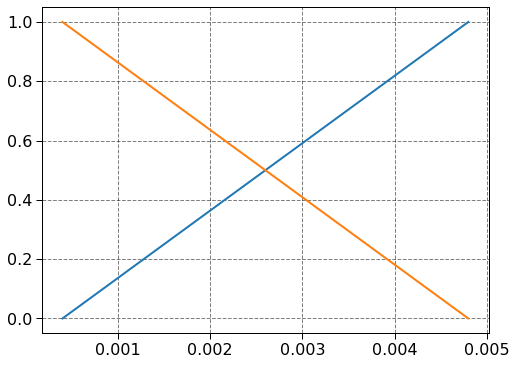

In [6]:
Z1, Z2, Z3 = sp.symbols('Z1 Z2 Z3')

M1 = (Z1 - z1_min) / (z1_max - z1_min)
N1 = (Z2 - z2_min) / (z2_max - z2_min)
P1 = (Z3 - z3_min) / (z3_max - z3_min)

M2 = 1 - M1
N2 = 1 - N1
P2 = 1 - P1

_Z1 = np.linspace(z1_min, z1_max, 100)
_Z2 = np.linspace(z2_min, z2_max, 100)
_Z3 = np.linspace(z3_min, z3_max, 100)

M1_func = sp.lambdify([Z1], M1)
N1_func = sp.lambdify([Z2], N1)
P1_func = sp.lambdify([Z3], P1)

M1_values = M1_func(_Z1)
N1_values = N1_func(_Z2)
P1_values = P1_func(_Z3)

plt.plot(_Z3, P1_values)
plt.plot(_Z3, 1-P1_values)

In [7]:
for i in range(len(A_vertices)):
    A = A_vertices[i]
    B = B_vertices[i]
    np.save(f'./vertices/A_{i}', A)
    np.save(f'./vertices/B_{i}', B)

In [8]:
import sympy as sp

Z1, Z2, Z3 = sp.symbols('Z1 Z2 Z3')

M1 = (Z1 - z1_min) / (z1_max - z1_min)
N1 = (Z2 - z2_min) / (z2_max - z2_min)
Q1 = (Z3 - z3_min) / (z3_max - z3_min)

M2 = 1 - M1
N2 = 1 - N1
Q2 = 1 - Q1

print(' ')
print(M1)
print(N1)
print(Q1)
print(' ')
print(M2)
print(N2)
print(Q2)

 
0.0109107652156076*Z1 - 1.36010544163504
0.00454413055105308*Z2 - 0.538288162403591
227.272727272727*Z3 - 0.0909090909090909
 
2.36010544163504 - 0.0109107652156076*Z1
1.53828816240359 - 0.00454413055105308*Z2
1.09090909090909 - 227.272727272727*Z3
